In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split, KFold, GroupKFold, cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
import keras.metrics
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/Users/polyanaboss/Desktop/Term paper/Data/processed_data_v.1.0.csv', 
                 index_col = ['day', 'ticker'])

In [3]:
df.dropna(axis = 0, how = 'any', inplace = True)

In [4]:
#df.drop([col for col in df.columns if col.startswith('sentiment') or col.startswith('topic')], 
 #       axis = 1, inplace = True)

In [5]:
df.head()

adjclose        ma_10        ma_20        ma_30  \
day        ticker                                                       
2021-03-04 AAPL     119.420219   124.660082   129.457326   131.775941   
           AMZN    2977.570068  3150.865967  3226.814465  3247.276636   
           NFLX     511.290009   542.648999   548.110004   549.791003   
2021-03-05 AMGN     220.646820   220.581917   224.169980   228.933960   
           AMZN    3000.459961  3115.799976  3210.066467  3237.749642   

                        ema_12       ema_26  rsi_6_sma  rsi_6_ema  rsi_12_sma  \
day        ticker                                                               
2021-03-04 AAPL     125.732602   128.423225  39.080453  33.325382   25.560048   
           AMZN    3148.529560  3196.767470  24.214878  26.776597   27.150401   
           NFLX     543.116656   543.017493  29.976383  44.271572   32.122175   
2021-03-05 AMGN     220.952093   224.423269  17.207729  21.321361   25.914517   
           AMZN    3122.227793  3180.443527  24.722160  26.121193   26.326743   

                   rsi_24_sma  ...  sentiment_35  sentiment_36  sentiment_37  \
day        ticker              ...                                             
2021-03-04 AAPL     29.139135  ...      0.467013      0.433376      0.424253   
           AMZN     38.840834  ...      0.518054      0.489071      0.472463   
           NFLX     49.305999  ...      0.532548      0.510936      0.481093   
2021-03-05 AMGN     24.227511  ...      0.560588      0.511620      0.527688   
           AMZN     37.522669  ...      0.454547      0.393381      0.453038   

                   sentiment_38  sentiment_39  topic_0  topic_1  topic_2  \
day        ticker                                                          
2021-03-04 AAPL        0.410886      0.439668        2        2        2   
           AMZN        0.461305      0.488746        2        2        2   
           NFLX        0.474581      0.500493        2        7        6   
2021-03-05 AMGN        0.506599      0.539568        2        2        8   
           AMZN        0.444550      0.472122        2        2        2   

                   topic_3  topic_4  
day        ticker                    
2021-03-04 AAPL          2        2  
           AMZN          2        2  
           NFLX          2        2  
2021-03-05 AMGN          3        8  
           AMZN          2        2  

[5 rows x 59 columns]

In [6]:
df.shape

(4476, 59)

### Baseline, Binary Target

In [7]:
X = df.drop(['target', 'trend'], axis = 1)
y = df['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0, stratify = y
                                                   )

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#### Log reg

In [10]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [11]:
# calculate roc curves
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr.predict_proba(X_test)[::, 1]) #model.predict(X_test)
# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print(f'Best Threshold = {best_thresh}')
print(metrics.classification_report((lr.predict_proba(X_test)[::, 1] > best_thresh), y_test))

Best Threshold = 0.36448651000920534
              precision    recall  f1-score   support

       False       0.75      0.79      0.77       551
        True       0.63      0.57      0.60       345

    accuracy                           0.70       896
   macro avg       0.69      0.68      0.68       896
weighted avg       0.70      0.70      0.70       896



In [12]:
import pickle
filename = 'binary_model.sav'
pickle.dump(lr, open(filename, 'wb'))

In [ ]:
#loaded_model = pickle.load(open(filename, 'rb'))

In [14]:
X_test.shape

(896, 57)

# Visualization

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df.head()

adjclose        ma_10        ma_20        ma_30  \
day        ticker                                                       
2021-03-04 AAPL     119.420219   124.660082   129.457326   131.775941   
           AMZN    2977.570068  3150.865967  3226.814465  3247.276636   
           NFLX     511.290009   542.648999   548.110004   549.791003   
2021-03-05 AMGN     220.646820   220.581917   224.169980   228.933960   
           AMZN    3000.459961  3115.799976  3210.066467  3237.749642   

                        ema_12       ema_26  rsi_6_sma  rsi_6_ema  rsi_12_sma  \
day        ticker                                                               
2021-03-04 AAPL     125.732602   128.423225  39.080453  33.325382   25.560048   
           AMZN    3148.529560  3196.767470  24.214878  26.776597   27.150401   
           NFLX     543.116656   543.017493  29.976383  44.271572   32.122175   
2021-03-05 AMGN     220.952093   224.423269  17.207729  21.321361   25.914517   
           AMZN    3122.227793  3180.443527  24.722160  26.121193   26.326743   

                   rsi_24_sma  ...  sentiment_35  sentiment_36  sentiment_37  \
day        ticker              ...                                             
2021-03-04 AAPL     29.139135  ...      0.467013      0.433376      0.424253   
           AMZN     38.840834  ...      0.518054      0.489071      0.472463   
           NFLX     49.305999  ...      0.532548      0.510936      0.481093   
2021-03-05 AMGN     24.227511  ...      0.560588      0.511620      0.527688   
           AMZN     37.522669  ...      0.454547      0.393381      0.453038   

                   sentiment_38  sentiment_39  topic_0  topic_1  topic_2  \
day        ticker                                                          
2021-03-04 AAPL        0.410886      0.439668        2        2        2   
           AMZN        0.461305      0.488746        2        2        2   
           NFLX        0.474581      0.500493        2        7        6   
2021-03-05 AMGN        0.506599      0.539568        2        2        8   
           AMZN        0.444550      0.472122        2        2        2   

                   topic_3  topic_4  
day        ticker                    
2021-03-04 AAPL          2        2  
           AMZN          2        2  
           NFLX          2        2  
2021-03-05 AMGN          3        8  
           AMZN          2        2  

[5 rows x 59 columns]

Text(0.5, 1.0, 'Top-10 RSI-24 companies')

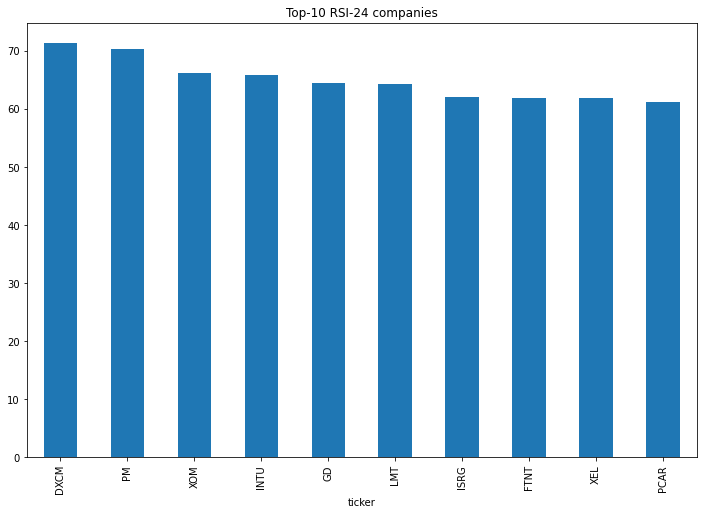

In [21]:
plt.figure(figsize=(12, 8))
df.groupby('ticker')['rsi_24_sma'].mean().sort_values(ascending = False)[:10].plot(kind = 'bar')
plt.title('Top-10 RSI-24 companies')

Text(0.5, 1.0, 'Most probable topics, total number')

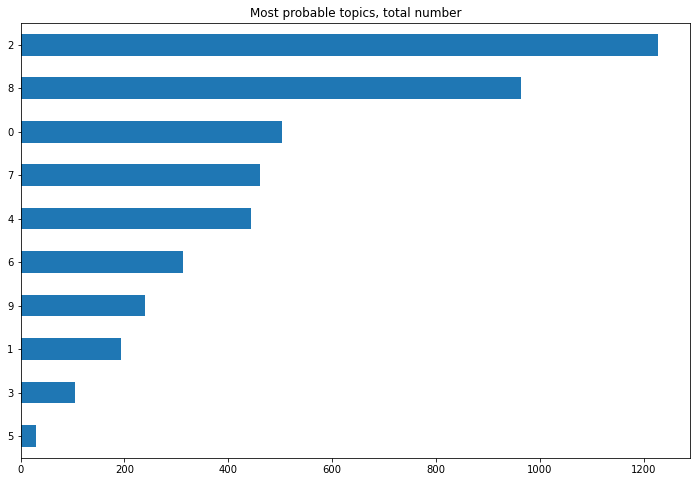

In [27]:
plt.figure(figsize=(12, 8))
df.topic_0.value_counts().sort_values().plot(kind = 'barh')
plt.title('Most probable topics, total number')


<AxesSubplot:ylabel='day'>

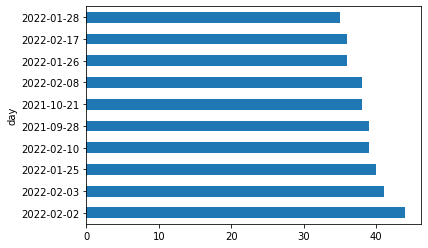

In [33]:
df.groupby('day')['adjclose'].count().sort_values(ascending=False)[:10].plot(kind = 'barh')

In [45]:
#custom function for the given ticker and indicator
def plot_stock_indicator(ticker, indicator):
    values = df.droplevel(0).reset_index()[df.droplevel(0).reset_index()['ticker'] == ticker][indicator]
    plt.figure(figsize=(12, 8))
    values.plot(kind = 'line')
    plt.title(f'{indicator} dynamics of {ticker}')
    plt.show()

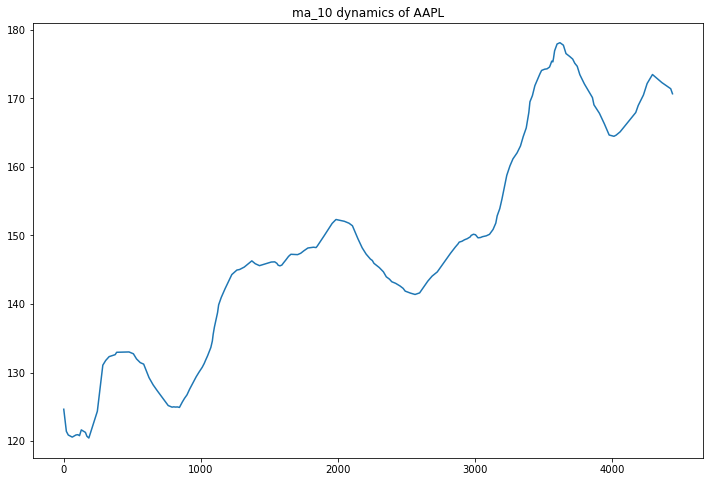

In [46]:
#example
plot_stock_indicator('AAPL', 'ma_10')